# ロジスティック回帰スクラッチ

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 【問題1】仮定関数

ロジスティック回帰の仮定関数のメソッドをScratchLogisticRegressionクラスに実装してください。


ロジスティック回帰の仮定関数は、線形回帰の仮定関数を**シグモイド関数**に通したものです。シグモイド関数は以下の式で表されます。

$$
g(z) = \frac{1}{1+e^{−z}}.
$$

線形回帰の仮定関数は次の式でした。

$$
h_\theta(x) = \theta^T \cdot x.
$$

まとめて書くと、ロジスティック回帰の仮定関数は次のようになります。

$$
h_\theta(x) = \frac{1}{1+e^{−\theta^T \cdot x}}.
$$

## 【問題2】最急降下法

最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fitメソッドから呼び出すようにしてください。

$$
\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}\\ \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m}  \sum_{i=1}^{m}(h_θ(x^{(i)}) − y^{(i)})x_j^{(i)}  ,j = 0\\ \frac{\partial J(\theta)}{\partial \theta_j} = \biggl(\frac{1}{m}  \sum_{i=1}^{m}(h_θ(x^{(i)}) − y^{(i)})x_j^{(i)} \biggr) + \frac{λ}{m}\theta_j　 ,j\geq 1
$$


$\alpha$ : 学習率


$i$ : サンプルのインデックス


$j$ : 特徴量のインデックス


$m$ : 入力されるデータの数


$h_\theta()$ : 仮定関数


$x$ : 特徴量ベクトル


$\theta$ : パラメータ（重み）ベクトル


$x^{(i)}$ : i番目のサンプルの特徴量ベクトル


$y^{(i)}$ : i番目のサンプルの正解ラベル


$\theta_j$ : j番目のパラメータ（重み）


$λ$ : 正則化パラメータ

## 【問題3】推定

推定する仕組みを実装してください。ScratchLogisticRegressionクラスの雛形に含まれるpredictメソッドとpredict_probaメソッドに書き加えてください。


仮定関数 $h_\theta(x)$ の出力がpredict_probaの返り値、さらにその値に閾値を設けて1と0のラベルとしたものがpredictの返り値となります。

## 【問題4】目的関数

以下の数式で表されるロジスティック回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。


なお、この数式には正則化項が含まれています。


＊数式が見切れる場合、DIVERを全画面にして御覧ください。

$$
J(\theta)=  \frac{1}{m}  \sum_{i=1}^{m}[−y^{(i)} log(h_θ(x^{(i)})) − (1−y^{(i)}) log(1−h_θ(x^{(i)}))] +
\frac{λ}{2m}\sum_{j=1}^n
θ^2_j.\\
$$

$m$ : 入力されるデータの数


$h_\theta()$ : 仮定関数


$x$ : 特徴量ベクトル


$\theta$ : パラメータ（重み）ベクトル


$x^{(i)}$ : i番目のサンプルの特徴量ベクトル


$y^{(i)}$ : i番目のサンプルの正解ラベル


$\theta_j$ : j番目のパラメータ（重み）


$n$ : 特徴量の数


$λ$ : 正則化パラメータ

**問１〜問４までをまとめて実装**

In [2]:
class ScratchLogisticRegression():
    def __init__(self, num_iter = 3000, lr = 0.1, lamb = 0.001, bias = True, verbose = False, save = True):
        # ハイパーパラメータを属性として記録
        self.num_iter = num_iter
        self.lr = lr
        self.lamb = lamb
        self.bias = bias
        self.verbose = verbose
        self.save = save
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.num_iter)
        self.val_loss = np.zeros(self.num_iter)
        self.coef_ = None

    # 問題1
    def _logistic_hypothesis(self, X):
        hypothesis = np.matmul(X, self.coef_.T)
        return self._sigmoid(hypothesis)

    def _sigmoid(self, X):
        return 1/ (1 + np.exp(-X))
    
    # 問題2
    def fit(self, X, y, X_val=None, y_val=None):
        if self.bias: # biasの有無で分岐させる
            X = np.hstack([np.ones([X.shape[0], 1]), X])
            self.coef_ = np.random.rand(len(X[0]))
        else:
            self.coef_ = np.random.rand(len(X[0]))

        # 検証データが入力された（array属性を有する）場合とそれ以外で分岐させる
        if hasattr(X_val, "__array__") and hasattr(y_val, "__array__"):
            for i in range(self.num_iter):
                hx = self._logistic_hypothesis(X)
                self.coef_ = self._gradient_descent(X, y, hx)
                self.loss[i] = self._loss_function(hx, y)
                y_pred = self.predict_proba(X_val) # 検証データに対する学習を追加する
                self.val_loss[i] = self._loss_function(y_pred, y_val)
        
        else:
            for i in range(self.num_iter):
                hx = self._logistic_hypothesis(X)               
                self.coef_ = self._gradient_descent(X, y, hx)
                self.loss[i] = self._loss_function(hx, y)

        if self.verbose: # verboseをTrueにした際は学習過程を出力
            print("loss：{}".format(self.loss))
            print("val_loss：{}".format(self.val_loss))

        # 問題8
        if self.save:
            np.savez("coef_.npz", self.coef_)
        
    # 問題2
    def _gradient_descent(self, X, y, hx):
        if self.bias: # biasの有無で分岐させる
            coef_adj = self.coef_ * np.hstack([np.zeros([1,]), np.ones([len(self.coef_) -1,])])
            self.coef_ -= self.lr * np.matmul((hx - y), X) / X.shape[0] + self.lamb * coef_adj / X.shape[0]
        else:
            self.coef_ -= self.lr * np.matmul((hx - y), X) / X.shape[0] + self.lamb * self.coef_ / X.shape[0]
     
        return self.coef_

    # 問題3
    def predict(self, X):
        if self.bias: # biasの有無で分岐させる
            X = np.hstack([np.ones([X.shape[0], 1]), X]) 
        else:
            pass

        predict = self._logistic_hypothesis(X)
        return np.where(predict >= 0.5, 1, 0)
    
    def predict_proba(self, X):
        if self.bias: # biasの有無で分岐させる
            X = np.hstack([np.ones([X.shape[0], 1]), X]) 
        else:
            pass

        predict_proba = self._logistic_hypothesis(X)
        return predict_proba

    # 問題4
    def _loss_function(self, hx, y):
        cross_entropy = np.sum((- y * np.log(hx)) - (1 - hx) * np.log(1 - hx)) / X.shape[0]

        if self.bias: # biasの有無で分岐させる
            weight_decay = self.lamb * np.sum(self.coef_[1:] ** 2) / (2 * X.shape[0] )
        else:
            weight_decay = self.lamb * np.sum(self.coef_ ** 2) / (2 * X.shape[0])

        loss = cross_entropy + weight_decay
        return loss

    # 問題6
    def learning_curve(self):
        plt.figure(figsize=(10, 7))
        plt.plot(np.arange(len(self.loss)) , self.loss, linewidth = 5.0, label = "train_loss")
        plt.plot(np.arange(len(self.val_loss)) , self.val_loss, linewidth = 5.0, label = "test_loss")
        plt.title("model loss")
        plt.xlabel("iter")
        plt.ylabel("loss")
        plt.legend()

## 【問題5】学習と推定

機械学習スクラッチ入門のSprintで用意したirisデータセットのvirgicolorとvirginicaの2値分類に対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。


AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [3]:
# irisデータセットを取得する
from sklearn.datasets import load_iris
iris = load_iris()

#データフレームに変換（列名を指定）し、データを結合する
iris_data = pd.DataFrame(iris.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
iris_target = pd.DataFrame(iris.target, columns=["Species"])
iris_all = pd.concat([iris_data, iris_target], axis=1)

# 「sepal_length」列、「petal_length」列、及び
# 「Species」列が「versicolor=1」か「virginica=2」である行を抽出する
iris_all = iris_all[["sepal_length","petal_length","Species"]][iris_all["Species"].isin([1,2])]

# 比較の便宜のため「versicolor=1⇨0」か「virginica=2⇨1」に値を変更する
iris_all2 = iris_all.replace({"Species": {1: 0, 2: 1}})

iris_all2

,sepal_length,petal_length,Species
50,7.0,4.7,0
51,6.4,4.5,0
52,6.9,4.9,0
53,5.5,4.0,0
54,6.5,4.6,0
...,...,...,...
145,6.7,5.2,1
146,6.3,5.0,1
147,6.5,5.2,1
148,6.2,5.4,1


In [4]:
# 目的変数と説明変数を切り離して、それぞれ配列に変換する
X = iris_all2.iloc[:,:-1].values
y = iris_all2.iloc[:,-1].values

# 訓練データと検証データに分割する（訓練データ75%、検証データ25%）
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75)

# 標準化を行う（訓練用のデータでfitを行い、訓練用、検証用双方のデータにtransformを行う）
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
# インスタンスを生成し、学習する
lr_scratch = ScratchLogisticRegression()
lr_scratch.fit(X_train_std, y_train, X_test_std, y_test)

# 推定し、結果を表示する
y_pred_lr = lr_scratch.predict(X_test_std)
y_pred_lr2 = lr_scratch.predict_proba(X_test_std)

print("仮定関数hθ(x)の出力")
print(y_pred_lr2)
print("予測値")
print(y_pred_lr)
print("正解値")
print(y_test)

仮定関数hθ(x)の出力
[9.99705981e-01 4.72123674e-01 9.99772026e-01 9.99997777e-01
 6.47536449e-05 7.85506399e-02 1.45618591e-01 3.22188690e-04
 3.96192092e-05 9.99855494e-01 9.99721143e-01 9.31290746e-01
 2.50823868e-01 3.82122970e-02 3.88664220e-02 9.99982233e-01
 9.77536688e-01 1.16720010e-01 9.71214486e-01 9.77536688e-01
 4.94663603e-03 6.26018972e-03 9.99999827e-01 9.45892953e-01
 5.12349754e-03]
予測値
[1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0]
正解値
[1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0]


In [6]:
# 目的関数の推移を表示する（verbose =True）
lr_scratch2 = ScratchLogisticRegression(verbose =True)
lr_scratch2.fit(X_train_std, y_train, X_test_std, y_test)

loss：[0.38174468 0.37968747 0.3776183  ... 0.10823776 0.10822865 0.10821954]
val_loss：[0.11310326 0.11200898 0.1109595  ... 0.02506425 0.02506122 0.0250582 ]


In [7]:
# 評価（各指標値を確認）する
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# 各指標値を表にまとめる
pred_df = pd.DataFrame({'ScratchLogisticRegression' : [accuracy_score(y_test, y_pred_lr), 
                                                    precision_score(y_test, y_pred_lr), 
                                                    recall_score(y_test, y_pred_lr), 
                                                    f1_score(y_test, y_pred_lr), 
                                                    confusion_matrix(y_test, y_pred_lr)]}, 
                                               index=["accuracy", "precision", "recall", "f1", "confusion_matrix"])

In [8]:
pred_df

,ScratchLogisticRegression
accuracy,0.92
precision,0.916667
recall,0.916667
f1,0.916667
confusion_matrix,"[[12, 1], [1, 11]]"


### scikit-learnによる実装の場合

In [9]:
#　ロジスティック回帰クラスを読み込む
from sklearn.linear_model import LogisticRegression

# インスタンスを生成し、学習する
lr_sklearn = LogisticRegression()
lr_sklearn.fit(X_train_std, y_train)

# 推定し、結果を表示する
y_pred_lr_sklearn = lr_sklearn.predict(X_test_std)

print("予測値")
print(y_pred_lr_sklearn)
print("正解値")
print(y_test)

予測値
[1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0]
正解値
[1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0]


In [11]:
# 各指標値を表にまとめる
pred_df = pred_df.assign(sklearn_Logistic = [accuracy_score(y_test, y_pred_lr_sklearn), 
                                                   precision_score(y_test, y_pred_lr_sklearn), 
                                                   recall_score(y_test, y_pred_lr_sklearn), 
                                                   f1_score(y_test, y_pred_lr_sklearn), 
                                                   confusion_matrix(y_test, y_pred_lr_sklearn)])

In [12]:
pred_df

,ScratchLogisticRegression,sklearn_Logistic
accuracy,0.92,0.92
precision,0.916667,0.916667
recall,0.916667,0.916667
f1,0.916667,0.916667
confusion_matrix,"[[12, 1], [1, 11]]","[[12, 1], [1, 11]]"


**スクラッチもAPIも結果は同じなので問題無さそう。**

## 【問題6】学習曲線のプロット

学習曲線を見て損失が適切に下がっているかどうか確認してください。

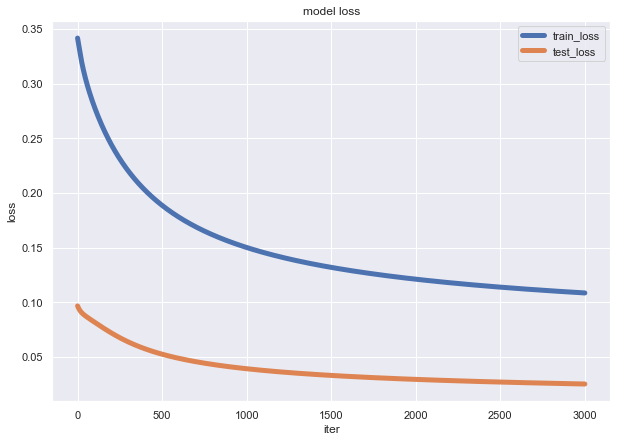

In [13]:
sns.set()
lr_scratch.learning_curve()

## 【問題7】決定領域の可視化
決定領域を可視化してください。

In [14]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

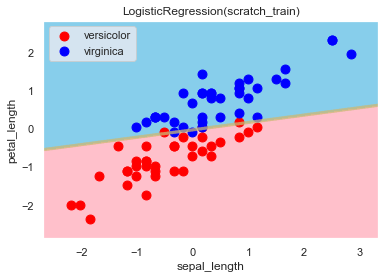

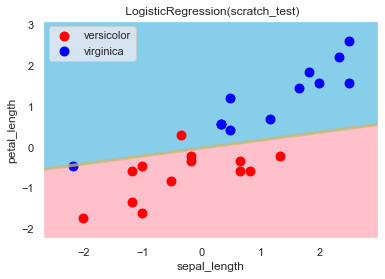

In [15]:
# scratchによる実装の場合

#  訓練データをプロットしてどのように学習したか観察する
decision_region(X_train_std, y_train, model=lr_scratch, title="LogisticRegression(scratch_train)", xlabel="sepal_length", ylabel="petal_length")

#  検証データをプロットしてどういった特徴量が間違って分類されたか観察する
decision_region(X_test_std, y_test, model=lr_scratch, title=" LogisticRegression(scratch_test)", xlabel="sepal_length", ylabel="petal_length")

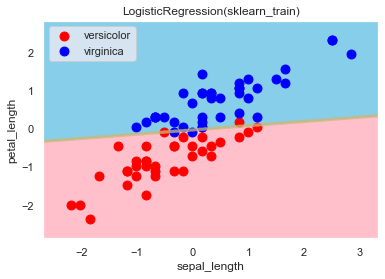

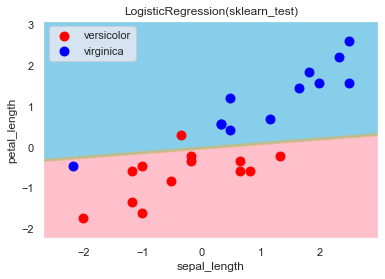

In [16]:
# scikit-learnによる実装

#  訓練データをプロットしてどのように学習したか観察する
decision_region(X_train_std, y_train, model=lr_sklearn, title="LogisticRegression(sklearn_train)", xlabel="sepal_length", ylabel="petal_length")

#  検証データをプロットしてどういった特徴量が間違って分類されたか観察する
decision_region(X_test_std, y_test, model=lr_sklearn, title="LogisticRegression(sklearn_test)", xlabel="sepal_length", ylabel="petal_length")

## 【問題8】（アドバンス課題）重みの保存
検証が容易になるように、学習した重みを保存および読み込みができるようにしましょう。pickleモジュールやNumPyのnp.savezを利用します。

In [17]:
# 学習した重みを読み込んで出力する
load = np.load("coef_.npz")

print(load["arr_0"])

[ 0.15332797 -1.42057963  7.31762884]
